In [161]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import hinge_loss
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
np.__version__

'1.11.1'

In [3]:
sk.__version__

'0.17.1'

### Return to using mean retirement age of HOF eligible players to obtain 'years remaining'. This gave better models than using retirement age of all MLB players throughout history (tried in v2). 

Input files from Explore_Clean_Data_v9.ipynb

There's a big difference in that age. The former on average plays until ~37 while the latter plays until ~29.

In [2]:
# X1 does not include 'year' column
with open('X_features_hitters.pkl') as f:
    X1 = pickle.load(f)
    
# X2 includes 'year' column
with open('X2_features_hitters.pkl') as f:
    X2 = pickle.load(f)

# X3 includes 'year' and 'yearID' columns
with open('X3_features_hitters.pkl') as f:
    X3 = pickle.load(f)

# X4 includes 'year', 'DBE1', 'DBE2', and 'SE' columns
with open('X4_features_hitters.pkl') as f:
    X4 = pickle.load(f)


In [3]:
with open('y_labels_hitter.pkl') as f:
    y = pickle.load(f)

### Split data into training and hold out set

In [8]:
X1_train_val, X1_holdout, y1_train_val, y1_holdout = train_test_split(X1, y, test_size=0.20, random_state=42)

In [9]:
X2_train_val, X2_holdout, y2_train_val, y2_holdout = train_test_split(X2, y, test_size=0.20, random_state=42)

In [10]:
X3_train_val, X3_holdout, y3_train_val, y3_holdout = train_test_split(X3, y, test_size=0.20, random_state=42)

In [11]:
X4_train_val, X4_holdout, y4_train_val, y4_holdout = train_test_split(X4, y, test_size=0.20, random_state=42)

### Split train_val data into training set and validation set

In [12]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train_val, y1_train_val, test_size=0.25, random_state=42)

In [13]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_val, y2_train_val, test_size=0.25, random_state=42)

In [14]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train_val, y3_train_val, test_size=0.25, random_state=42)

In [15]:
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train_val, y4_train_val, test_size=0.25, random_state=42)

### Over-sampled data

In [64]:
# Generate the new dataset using under-sampling method
verbose = False
ratio = 'auto'

# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio, verbose=verbose)
X1_train_os, y1_train_os = OS.fit_sample(X1_train, y1_train)

# 'SMOTE'
smote = SMOTE(ratio=ratio, verbose=verbose, kind='regular')
X1_train_smo, y1_train_smo = smote.fit_sample(X1_train, y1_train)

# 'SMOTE bordeline 1'
bsmote1 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline1')
X1_train_bs1, y1_train_bs1 = bsmote1.fit_sample(X1_train, y1_train)

# 'SMOTE bordeline 2'
bsmote2 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline2')
X1_train_bs2, y1_train_bs2 = bsmote2.fit_sample(X1_train, y1_train)

# 'SMOTE SVM'
svm_args={'class_weight': 'auto'}
svmsmote = SMOTE(ratio=ratio, verbose=verbose, kind='svm', **svm_args)
X1_train_svs, y1_train_svs = svmsmote.fit_sample(X1_train, y1_train)


/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


### linear SVM - data 1

In [17]:
svm01 = LinearSVC()

In [53]:
svm01.fit(X1_train, y1_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
svm01_predictions = svm01.predict(X1_val)

In [21]:
svm01.score(X1_val, y1_val)

0.82056798623063687

In [100]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01_predictions)

Accuracy: 0.8206
Recall: 0.3687
Precision: 0.797
Hinge loss: 0.932
F1 score: 0.5042


In [101]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01_predictions)
svm01_fpr, svm01_tpr, thresholds = metrics.roc_curve(y1_val, svm01_predictions)
print "AUC: %.4g" % metrics.auc(svm01_fpr, svm01_tpr)

Accuracy: 0.8206
Recall: 0.3687
Precision: 0.797
Hinge loss: 0.932
F1 score: 0.5042
AUC: 0.6689


### linear SVM model  w/ data 2

In [24]:
svm02 = LinearSVC()
svm02.fit(X2_train, y2_train)
svm02_predictions = svm02.predict(X2_val)

In [111]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, svm02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, svm02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, svm02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, svm02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, svm02_predictions)
svm02_fpr, svm02_tpr, thresholds = metrics.roc_curve(y2_val, svm02_predictions)
print "AUC: %.4g" % metrics.auc(svm02_fpr, svm02_tpr)

Accuracy: 0.8167
Recall: 0.3513
Precision: 0.7922
Hinge loss: 0.9359
F1 score: 0.4867
AUC: 0.6605


In [69]:
confusion_matrix(y_test, svm02_predictions)

array([[2583,  118],
       [ 462,  323]])

### Balance classes

In [55]:
svm02b = LinearSVC(class_weight='auto')
svm02b.fit(X2_train, y2_train)
svm02b_predictions = svm02b.predict(X2_val)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [34]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, svm02b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, svm02b_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, svm02b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, svm02b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, svm02b_predictions)

Accuracy: 0.7199
Recall: 0.8261
Precision: 0.463
Hinge loss: 1.033
F1 score: 0.5934


In [18]:
# Old
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, svm02b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, svm02b_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, svm02b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, svm02b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, svm02b_predictions)

Accuracy: 0.7757
Recall: 0.7363
Precision: 0.5013
Hinge loss: 0.9991
F1 score: 0.5965


### Do grid search

In [35]:
param_grid_svm02b = {'C': [0.1, 1, 2.5, 5, 7.5, 10, 20, 50]}

svm02b_gscv = GridSearchCV(svm02b, param_grid_svm02b)
svm02b_gscv.fit(X2_train_val, y2_train_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 2.5, 5, 7.5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
svm02b_gscv.best_params_

{'C': 7.5}

In [58]:
svm02c = LinearSVC(C=7.5, class_weight='auto')
svm02c.fit(X2_train, y2_train)
svm02c_predictions = svm02c.predict(X2_val)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [59]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, svm02c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, svm02c_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, svm02c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, svm02c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, svm02c_predictions)

Accuracy: 0.787
Recall: 0.473
Precision: 0.5862
Hinge loss: 0.9656
F1 score: 0.5236


In [57]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, svm02c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, svm02c_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, svm02c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, svm02c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, svm02c_predictions)

Accuracy: 0.7853
Recall: 0.5165
Precision: 0.5734
Hinge loss: 0.9673
F1 score: 0.5435


In [22]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, svm02c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, svm02c_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, svm02c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, svm02c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, svm02c_predictions)

Accuracy: 0.7935
Recall: 0.5045
Precision: 0.5447
Hinge loss: 0.9814
F1 score: 0.5238


### linear SVM - data 3

In [68]:
svm03 = LinearSVC()
svm03.fit(X3_train, y3_train)
svm03_predictions = svm03.predict(X3_val)

In [70]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svm03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svm03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svm03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svm03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svm03_predictions)

Accuracy: 0.2474
Recall: 1
Precision: 0.2474
Hinge loss: 1.505
F1 score: 0.3967


In [26]:
# Old
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, svm03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, svm03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, svm03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, svm03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, svm03_predictions)

Accuracy: 0.7877
Recall: 0.06752
Precision: 0.8689
Hinge loss: 0.9871
F1 score: 0.1253


In [19]:
confusion_matrix(y_test, svm03_predictions)

array([[2701,    0],
       [ 785,    0]])

### linear SVM - data 4

In [71]:
svm04 = LinearSVC()
svm04.fit(X4_train, y4_train)
svm04_predictions = svm04.predict(X4_val)

In [72]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_val, svm04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_val, svm04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_val, svm04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_val, svm04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_val, svm04_predictions)

Accuracy: 0.7526
Recall: 0
Precision: 0
Hinge loss: 1
F1 score: 0


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Basic linear SVM model with data 1 gave best F1-score

### Try Over-sampling training data

In [65]:
# Smote SVM
svm01svs = LinearSVC()
svm01svs.fit(X1_train_svs, y1_train_svs)
svm01svs_predictions = svm01svs.predict(X1_val)

In [118]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01svs_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01svs_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01svs_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01svs_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01svs_predictions)
svm01svs_fpr, svm01svs_tpr, thresholds = metrics.roc_curve(y1_val, svm01svs_predictions)
print "AUC: %.4g" % metrics.auc(svm01svs_fpr, svm01svs_tpr)

Accuracy: 0.7083
Recall: 0.8226
Precision: 0.4509
Hinge loss: 1.044
F1 score: 0.5825
AUC: 0.7466


In [117]:
# Random oversampling
svm01os = LinearSVC()
svm01os.fit(X1_train_os, y1_train_os)
svm01os_predictions = svm01svs.predict(X1_val)

In [119]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01os_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01os_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01os_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01os_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01os_predictions)
svm01os_fpr, svm01os_tpr, thresholds = metrics.roc_curve(y1_val, svm01os_predictions)
print "AUC: %.4g" % metrics.auc(svm01os_fpr, svm01os_tpr)

Accuracy: 0.7083
Recall: 0.8226
Precision: 0.4509
Hinge loss: 1.044
F1 score: 0.5825
AUC: 0.7466


In [120]:
# SMOTE
svm01smo = LinearSVC()
svm01smo.fit(X1_train_smo, y1_train_smo)
svm01smo_predictions = svm01smo.predict(X1_val)

In [121]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01smo_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01smo_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01smo_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01smo_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01smo_predictions)
svm01smo_fpr, svm01smo_tpr, thresholds = metrics.roc_curve(y1_val, svm01smo_predictions)
print "AUC: %.4g" % metrics.auc(svm01smo_fpr, svm01smo_tpr)

Accuracy: 0.7612
Recall: 0.7583
Precision: 0.5117
Hinge loss: 0.9914
F1 score: 0.6111
AUC: 0.7602


In [122]:
# SMOTE borderline 1
svm01bs1 = LinearSVC()
svm01bs1.fit(X1_train_bs1, y1_train_bs1)
svm01bs1_predictions = svm01bs1.predict(X1_val)

In [123]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01bs1_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01bs1_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01bs1_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01bs1_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01bs1_predictions)
svm01bs1_fpr, svm01bs1_tpr, thresholds = metrics.roc_curve(y1_val, svm01bs1_predictions)
print "AUC: %.4g" % metrics.auc(svm01bs1_fpr, svm01bs1_tpr)

Accuracy: 0.7255
Recall: 0.7826
Precision: 0.4673
Hinge loss: 1.027
F1 score: 0.5852
AUC: 0.7446


In [ ]:
# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio, verbose=verbose)
X1_train_os, y1_train_os = OS.fit_sample(X1_train, y1_train)

# 'SMOTE'
smote = SMOTE(ratio=ratio, verbose=verbose, kind='regular')
X1_train_smo, y1_train_smo = smote.fit_sample(X1_train, y1_train)

# 'SMOTE bordeline 1'
bsmote1 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline1')
X1_train_bs1, y1_train_bs1 = bsmote1.fit_sample(X1_train, y1_train)

# 'SMOTE bordeline 2'
bsmote2 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline2')
X1_train_bs2, y1_train_bs2 = bsmote2.fit_sample(X1_train, y1_train)


In [73]:
# Compared to original no over-sampling
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01_predictions)

Accuracy: 0.8206
Recall: 0.3687
Precision: 0.797
Hinge loss: 0.932
F1 score: 0.5042


### svm01svs = best linear SVM model. Do param grid search on this

In [78]:
param_grid_svm01svs = {'C': [1, 10, 50, 250]}

svm01svs_gscv = GridSearchCV(svm01svs, param_grid_svm01svs)
svm01svs_gscv.fit(X1_train_val, y1_train_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 50, 250]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [79]:
svm01svs_gscv.best_params_

{'C': 1}

In [80]:
svm01svs_gscv.best_score_

0.82825782847304419

In [81]:
svm01b_svs = LinearSVC(C=1)
svm01b_svs.fit(X1_train_svs, y1_train_svs)
svm01b_svs_predictions = svm01b_svs.predict(X1_val)

In [82]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svm01b_svs_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svm01b_svs_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svm01b_svs_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svm01b_svs_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svm01b_svs_predictions)

Accuracy: 0.7083
Recall: 0.8226
Precision: 0.4509
Hinge loss: 1.044
F1 score: 0.5825


### Best linear SVM model is svm01svo:

        Accuracy: 0.7612
        Recall: 0.7583
        Precision: 0.5117
        Hinge loss: 0.9914
        F1 score: 0.6111
        AUC: 0.7602


## Non-linear SVM models

### non-linear SVM - data 1

In [60]:
svmnl01 = SVC()
svmnl01.fit(X1_train, y1_train)
svmnl01_predictions = svmnl01.predict(X1_val)

In [61]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, svmnl01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, svmnl01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, svmnl01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, svmnl01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, svmnl01_predictions)

Accuracy: 0.8305
Recall: 0.3948
Precision: 0.8315
Hinge loss: 0.9221
F1 score: 0.5354


In [132]:
# Old
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, svmnl01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, svmnl01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, svmnl01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, svmnl01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, svmnl01_predictions)

Accuracy: 0.8419
Recall: 0.3962
Precision: 0.8015
Hinge loss: 0.9329
F1 score: 0.5303


### SVMnl - data 2

In [62]:
svmnl02 = SVC()
svmnl02.fit(X2_train, y2_train)
svmnl02_predictions = svmnl02.predict(X2_val)

In [63]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, svmnl02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, svmnl02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, svmnl02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, svmnl02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, svmnl02_predictions)

Accuracy: 0.8236
Recall: 0.3861
Precision: 0.7957
Hinge loss: 0.929
F1 score: 0.5199


In [135]:
# Old
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, svmnl02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, svmnl02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, svmnl02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, svmnl02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, svmnl02_predictions)

Accuracy: 0.8417
Recall: 0.3962
Precision: 0.7995
Hinge loss: 0.9332
F1 score: 0.5298


### non-linear SVM - data 3

In [85]:
svmnl03 = SVC()
svmnl03.fit(X3_train, y3_train)
svmnl03_predictions = svmnl03.predict(X3_val)

In [86]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03_predictions)

Accuracy: 0.8244
Recall: 0.4104
Precision: 0.7738
Hinge loss: 0.9281
F1 score: 0.5364


In [11]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, svmnl03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, svmnl03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, svmnl03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, svmnl03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, svmnl03_predictions)

Accuracy: 0.8405
Recall: 0.4064
Precision: 0.78
Hinge loss: 0.9343
F1 score: 0.5343


In [139]:
svmnl03b = SVC(kernel='rbf', C=100, class_weight={0:0.5, 1:0.5})
svmnl03b.fit(X3_train, y3_train)
svmnl03b_predictions = svmnl03b.predict(X3_val)

In [140]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03b_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03b_predictions)

Accuracy: 0.8847
Recall: 0.6939
Precision: 0.8126
Hinge loss: 0.8679
F1 score: 0.7486


In [141]:
svmnl03c = SVC(kernel='rbf', C=200, class_weight={0: 0.75, 1: 0.25})
svmnl03c.fit(X3_train, y3_train)
svmnl03c_predictions = svmnl03c.predict(X3_val)

In [142]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03c_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03c_predictions)

Accuracy: 0.8886
Recall: 0.64
Precision: 0.8762
Hinge loss: 0.864
F1 score: 0.7397


In [153]:
svmnl03d = SVC(kernel='rbf', C=500, class_weight={0: 0.75, 1: 0.25})
svmnl03d.fit(X3_train, y3_train)
svmnl03d_predictions = svmnl03d.predict(X3_val)

In [154]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03d_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03d_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03d_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03d_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03d_predictions)

Accuracy: 0.8967
Recall: 0.7252
Precision: 0.8357
Hinge loss: 0.8559
F1 score: 0.7765


In [145]:
svmnl03e = SVC(kernel='rbf', C=1000, class_weight={0: 0.75, 1: 0.25})
svmnl03e.fit(X3_train, y3_train)
svmnl03e_predictions = svmnl03e.predict(X3_val)

In [146]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03e_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03e_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03e_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03e_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03e_predictions)

Accuracy: 0.8877
Recall: 0.7374
Precision: 0.794
Hinge loss: 0.8649
F1 score: 0.7647


In [81]:
print classification_report(y3_test, svmnl03e_predictions)

             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2701
          1       0.83      0.77      0.80       785

avg / total       0.91      0.91      0.91      3486



### non-linear SVM - data 4

In [87]:
svmnl04 = SVC()
svmnl04.fit(X4_train, y4_train)
svmnl04_predictions = svmnl04.predict(X4_val)

In [88]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y4_val, svmnl04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_val, svmnl04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_val, svmnl04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_val, svmnl04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_val, svmnl04_predictions)

Accuracy: 0.8253
Recall: 0.4052
Precision: 0.7845
Hinge loss: 0.9273
F1 score: 0.5344


In [139]:
# Old
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, svmnl04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, svmnl04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, svmnl04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, svmnl04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, svmnl04_predictions)

Accuracy: 0.8396
Recall: 0.3962
Precision: 0.7854
Hinge loss: 0.9352
F1 score: 0.5267


### non-linear SVM with data 3 gave best F1-score

### Do grid search for non-linear model w/ data 3

In [147]:
param_grid_svmnl03 = {'C': [1, 10, 50, 250, 500], 'kernel': ['rbf', 'sigmoid'], 
                        'class_weight': ['auto', {0:0.75, 1:0.25}, {0: 0.5, 1: 0.5}]}

svmnl03_gscv = GridSearchCV(svmnl03, param_grid_svmnl03, scoring='f1')
svmnl03_gscv.fit(X3_train, y3_train)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid'], 'C': [1, 10, 50, 250, 500], 'class_weight': ['auto', {0: 0.75, 1: 0.25}, {0: 0.5, 1: 0.5}]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [148]:
svmnl03_gscv.best_params_

{'C': 50, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'rbf'}

In [126]:
svmnl03_gscv.best_params_

{'C': 50, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'rbf'}

#### svmnl03f

In [151]:
# Use grid-search best params
svmnl03f = SVC(kernel='rbf', C=500, class_weight={0: 0.5, 1: 0.5})
#{'C': 50, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'rbf'}
svmnl03f.fit(X3_train, y3_train)
svmnl03f_predictions = svmnl03f.predict(X3_val)

In [152]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03f_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03f_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03f_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03f_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03f_predictions)

Accuracy: 0.8898
Recall: 0.7635
Precision: 0.7853
Hinge loss: 0.8627
F1 score: 0.7743


### svmnl03d yields best f1 score.

### Cross-validation

In [155]:
print "Accuracy cv: %.4g" % cross_val_score(svmnl03d, X3_train_val, y3_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(svmnl03d, X3_train_val, y3_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(svmnl03d, X3_train_val, y3_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(svmnl03d, X3_train_val, y3_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8953
Recall cv: 0.7083
Precision cv: 0.8227
F1 score cv: 0.7609


In [132]:
print "Accuracy cv: %.4g" % cross_val_score(svmnl03f, X3_train_val, y3_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(svmnl03f, X3_train_val, y3_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(svmnl03f, X3_train_val, y3_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(svmnl03f, X3_train_val, y3_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8923
Recall cv: 0.7485
Precision cv: 0.7846
F1 score cv: 0.7659


### Train on all training data

In [156]:
# Use grid-search best params
svmnl03d2 = SVC(kernel='rbf', C=500, class_weight={0: 0.75, 1: 0.5})
#{'C': 50, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'rbf'}
svmnl03d2.fit(X3_train_val, y3_train_val)
svmnl03d2_predictions = svmnl03d2.predict(X3_holdout)

In [157]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_holdout, svmnl03d2_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_holdout, svmnl03d2_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_holdout, svmnl03d2_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_holdout, svmnl03d2_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_holdout, svmnl03d2_predictions)

Accuracy: 0.9208
Recall: 0.7694
Precision: 0.8505
Hinge loss: 0.8627
F1 score: 0.8079


In [135]:
# Use grid-search best params
svmnl03f2 = SVC(kernel='rbf', C=500, class_weight={0: 0.5, 1: 0.5})
#{'C': 50, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'rbf'}
svmnl03f2.fit(X3_train_val, y3_train_val)
svmnl03f2_predictions = svmnl03f2.predict(X3_holdout)

In [136]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_holdout, svmnl03f2_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_holdout, svmnl03f2_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_holdout, svmnl03f2_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_holdout, svmnl03f2_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_holdout, svmnl03f2_predictions)

Accuracy: 0.9144
Recall: 0.7773
Precision: 0.818
Hinge loss: 0.8692
F1 score: 0.7971


In [49]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, svmnl03e_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, svmnl03e_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, svmnl03e_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, svmnl03e_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, svmnl03e_predictions)

Accuracy: 0.9114
Recall: 0.7656
Precision: 0.8278
Hinge loss: 0.8635
F1 score: 0.7955


### Grid search results don't seem to yield optimal params. smnl03f (using grid search results) is not as good as smnl03e (optimized manually) 

In [137]:
# Continue to optimize manually. This is optimum so far
svmnl03g = SVC(kernel='rbf', C=1000, class_weight={0: 0.75, 1: 0.25})
# class_weight={0: 0.75, 1: 0.25}
svmnl03g.fit(X3_train, y3_train)
svmnl03g_predictions = svmnl03g.predict(X3_val)

In [138]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, svmnl03g_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, svmnl03g_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, svmnl03g_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, svmnl03g_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, svmnl03g_predictions)

Accuracy: 0.8877
Recall: 0.7374
Precision: 0.794
Hinge loss: 0.8649
F1 score: 0.7647


### Best non-linear cv model = smnl03d

        Accuracy cv: 0.8953
        Recall cv: 0.7083
        Precision cv: 0.8227
        F1 score cv: 0.7609

## Logistic regression

### Logistic regression model  - data 1

In [176]:
logr01 = LogisticRegression(n_jobs=-1)
logr01.fit(X1_train, y1_train)
logr01_predictions = logr01.predict(X1_val)

In [177]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_val, logr01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_val, logr01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_val, logr01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_val, logr01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_val, logr01_predictions)

Accuracy: 0.827
Recall: 0.4087
Precision: 0.7912
Hinge loss: 0.9256
F1 score: 0.539


In [170]:
# CV
print "Accuracy cv: %.4g" % cross_val_score(logr01, X1_train_val, y1_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(logr01, X1_train_val, y1_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(logr01, X1_train_val, y1_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(logr01, X1_train_val, y1_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8337
Recall cv: 0.4307
Precision cv: 0.7592
F1 score cv: 0.5493


### Logistic regression model - data 2

In [164]:
logr02 = LogisticRegression()
logr02.fit(X2_train, y2_train)
logr02_predictions = logr02.predict(X2_val)

In [165]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y2_val, logr02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_val, logr02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_val, logr02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_val, logr02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_val, logr02_predictions)

Accuracy: 0.8219
Recall: 0.4122
Precision: 0.7572
Hinge loss: 0.9307
F1 score: 0.5338


In [171]:
# CV
print "Accuracy cv: %.4g" % cross_val_score(logr02, X2_train_val, y2_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(logr02, X2_train_val, y2_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(logr02, X2_train_val, y2_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(logr02, X2_train_val, y2_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8293
Recall cv: 0.4289
Precision cv: 0.7366
F1 score cv: 0.5418


### Logistic regression - data 3

In [167]:
logr03 = LogisticRegression()
logr03.fit(X3_train, y3_train)
logr03_predictions = logr03.predict(X3_val)

In [168]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, logr03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, logr03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, logr03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, logr03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, logr03_predictions)

Accuracy: 0.8257
Recall: 0.4261
Precision: 0.7656
Hinge loss: 0.9269
F1 score: 0.5475


In [172]:
# CV
print "Accuracy cv: %.4g" % cross_val_score(logr03, X3_train_val, y3_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(logr03, X3_train_val, y3_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(logr03, X3_train_val, y3_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(logr03, X3_train_val, y3_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8329
Recall cv: 0.4202
Precision cv: 0.7491
F1 score cv: 0.533


### Logistic regression - data 4

In [174]:
logr04 = LogisticRegressionCV()
logr04.fit(X4_train, y4_train)
logr04_predictions = logr04.predict(X4_val)

In [68]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, logr04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, logr04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, logr04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, logr04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, logr04_predictions)

Accuracy: 0.8259
Recall: 0.3656
Precision: 0.7247
Hinge loss: 0.9489
F1 score: 0.486


In [175]:
# CV
print "Accuracy cv: %.4g" % cross_val_score(logr04, X4_train_val, y4_train_val, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(logr04, X4_train_val, y4_train_val, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(logr04, X4_train_val, y4_train_val, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(logr04, X4_train_val, y4_train_val, cv=5, scoring='f1').mean()


Accuracy cv: 0.8316
Recall cv: 0.4376
Precision cv: 0.7401
F1 score cv: 0.5417


### Data 1 yields the best logistic regression model
### Do grid search on this model

In [ ]:
param_grid_logr01 = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 
                     'class_weight': [None, 'auto']}

logr01_gscv = GridSearchCV(logr01, param_grid_logr01)
logr01_gscv.fit(X3_train_val, y3_train_val)

### Random Forest models

In [38]:
rf01 = RandomForestClassifier(n_estimators=200)
rf01.fit(X1_train, y1_train)
rf01_predictions = rf01.predict(X1_test)

In [39]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, rf01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, rf01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, rf01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, rf01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, rf01_predictions)

Accuracy: 0.9142
Recall: 0.6815
Precision: 0.9161
Hinge loss: 0.8606
F1 score: 0.7816


In [88]:
# Using mean retirement age of all MLB players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, rf01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, rf01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, rf01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, rf01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, rf01_predictions)

Accuracy: 0.8603
Recall: 0.4739
Precision: 0.8341
Hinge loss: 0.9145
F1 score: 0.6044


### RF model with class_weight set to auto

In [44]:
rf01b = RandomForestClassifier(n_estimators=200, class_weight='auto')
rf01b.fit(X1_train, y1_train)
rf01b_predictions = rf01b.predict(X1_test)

In [50]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, rf01b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, rf01b_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, rf01b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, rf01b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, rf01b_predictions)

Accuracy: 0.9142
Recall: 0.6726
Precision: 0.9263
Hinge loss: 0.8606
F1 score: 0.7793


In [87]:
# Using mean retirement age of all MLB players
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, rf01b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, rf01b_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, rf01b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, rf01b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, rf01b_predictions)

Accuracy: 0.8635
Recall: 0.4815
Precision: 0.8456
Hinge loss: 0.9114
F1 score: 0.6136


In [128]:
confusion_matrix(y_test, rf01_predictions)

array([[2654,   47],
       [ 258,  527]])

In [46]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

### RF model 2

In [46]:
rf02 = RandomForestClassifier(n_estimators=200)
rf02.fit(X2_train, y2_train)
rf02_predictions = rf02.predict(X2_test)

In [47]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, rf02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, rf02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, rf02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, rf02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, rf02_predictions)

Accuracy: 0.9157
Recall: 0.6841
Precision: 0.9211
Hinge loss: 0.8592
F1 score: 0.7851


In [86]:
# Using mean retirement age of all MLB players
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, rf02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, rf02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, rf02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, rf02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, rf02_predictions)

Accuracy: 0.8789
Recall: 0.5682
Precision: 0.8431
Hinge loss: 0.8959
F1 score: 0.6788


In [133]:
confusion_matrix(y_test, rf02_predictions)

array([[2654,   47],
       [ 257,  528]])

### RF model 3

In [103]:
rf03 = RandomForestClassifier(n_estimators=200)
rf03.fit(X3_train, y3_train)
rf03_predictions = rf03.predict(X3_val)

In [104]:
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_val, rf03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_val, rf03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_val, rf03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_val, rf03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_val, rf03_predictions)
rf03_fpr, rf03_tpr, thresholds = metrics.roc_curve(y1_val, rf03_predictions)
print "AUC: %.4g" % metrics.auc(rf03_fpr, rf03_tpr)

Accuracy: 0.9157
Recall: 0.7096
Precision: 0.9336
Hinge loss: 0.8369
F1 score: 0.8063
AUC: 0.8465


array([2, 1, 0])

In [49]:
# Old
# Using mean retirement age of HOF eligible players
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, rf03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, rf03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, rf03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, rf03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, rf03_predictions)

Accuracy: 0.9269
Recall: 0.7478
Precision: 0.9115
Hinge loss: 0.848
F1 score: 0.8216


### RF model 3 with sample_weight

In [8]:
rf03b = RandomForestClassifier(n_estimators=200)
rf03b.fit(X3_train, y3_train,  sample_weight=np.array([0.3 if i == 1 else 1 for i in y3_train]))
rf03b_predictions = rf03b.predict(X3_test)

NameError: name 'X3_train' is not defined

In [115]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, rf03b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, rf03b_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, rf03b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, rf03b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, rf03b_predictions)

Accuracy: 0.9269
Recall: 0.7516
Precision: 0.9077
Hinge loss: 0.848
F1 score: 0.8223


In [123]:
rf03b = RandomForestClassifier(n_jobs=-1)
rf03b.fit(X3_train, y3_train)
rf03b_predictions = rf03b.predict(X3_test)

In [124]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, rf03b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, rf03b_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, rf03b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, rf03b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, rf03b_predictions)

Accuracy: 0.9142
Recall: 0.6968
Precision: 0.8997
Hinge loss: 0.8606
F1 score: 0.7854


In [125]:
param_grid_rf03b = {'n_estimators': [10, 50, 100, 200, 300], 'max_features': ['sqrt', 'log2', None],
                    'max_depth': [None, 10, 25, 50], 'min_samples_leaf': [1, 10, 50],
                    'class_weight': ['auto', 'subsample', None]}

#         {n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
#                     min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
#                     max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
#                     verbose=0, warm_start=False, class_weight=None}

rf03b_gscv = GridSearchCV(rf03b, param_grid_rf03b)
rf03b_gscv.fit(X3_train, y3_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200, 300], 'max_features': ['sqrt', 'log2', None], 'class_weight': ['auto', 'subsample', None], 'max_depth': [None, 10, 25, 50], 'min_samples_leaf': [1, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [127]:
rf03b_gscv.best_params_

{'class_weight': None,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [18]:
# Build model based on above grid search results
rf03c = RandomForestClassifier(n_jobs=-1, max_depth=50, max_features='sqrt', min_samples_leaf=1, n_estimators=300,
                              random_state=23)
rf03c.fit(X3_train, y3_train)
rf03c_predictions = rf03c.predict(X3_test)

In [19]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, rf03c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, rf03c_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, rf03c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, rf03c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, rf03c_predictions)

Accuracy: 0.9269
Recall: 0.7427
Precision: 0.9167
Hinge loss: 0.848
F1 score: 0.8205


### RF model 4

In [108]:
rf04 = RandomForestClassifier(n_estimators=200, random_state=23)
rf04.fit(X4_train, y4_train)
rf04_predictions = rf04.predict(X4_val)
rf04_probas = rf04.predict_proba(X4_val)

In [109]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_val, rf04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_val, rf04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_val, rf04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_val, rf04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_val, rf04_predictions)

Accuracy: 0.9118
Recall: 0.6957
Precision: 0.9302
Hinge loss: 0.8408
F1 score: 0.796


In [28]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, rf04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, rf04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, rf04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, rf04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, rf04_predictions)

Accuracy: 0.9269
Recall: 0.7478
Precision: 0.9115
Hinge loss: 0.848
F1 score: 0.8216


In [26]:
rf04b = RandomForestClassifier(n_estimators=300, max_depth=50, random_state=23)
rf04b.fit(X4_train, y4_train)
rf04b_predictions = rf04.predict(X4_test)
rf04b_probas = rf04b.predict_proba(X4_test)

In [30]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, rf04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, rf04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, rf04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, rf04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, rf04_predictions)

Accuracy: 0.9269
Recall: 0.7478
Precision: 0.9115
Hinge loss: 0.848
F1 score: 0.8216


### Use class weight

In [31]:
rf04c = RandomForestClassifier(n_estimators=300, max_depth=50, class_weight={0: 0.75, 1: 0.25}, random_state=23)
rf04c.fit(X4_train, y4_train)
rf04c_predictions = rf04.predict(X4_test)
rf04c_probas = rf04c.predict_proba(X4_test)

In [32]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, rf04c_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, rf04c_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, rf04c_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, rf04c_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, rf04c_predictions)

Accuracy: 0.9269
Recall: 0.7478
Precision: 0.9115
Hinge loss: 0.848
F1 score: 0.8216


### Class weight doesn't change results

### Use sample_weight

In [63]:
rf04d = RandomForestClassifier(n_estimators=300, max_depth=50, random_state=23)
rf04d.fit(X4_train, y4_train, sample_weight=np.array([0.3 if i == 1 else 1 for i in y3_train]))
rf04d_predictions = rf04d.predict(X4_test)
rf04d_probas = rf04d.predict_proba(X4_test)

In [64]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, rf04d_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, rf04d_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, rf04d_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, rf04d_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, rf04d_predictions)

Accuracy: 0.9271
Recall: 0.7554
Precision: 0.9053
Hinge loss: 0.8477
F1 score: 0.8236


In [80]:
print "Accuracy cv: %.4g" % cross_val_score(rf04d, X4_train, y4_train, cv=5).mean()
print "Recall cv: %.4g" % cross_val_score(rf04d, X4_train, y4_train, cv=5, scoring='recall').mean()
print "Precision cv: %.4g" % cross_val_score(rf04d, X4_train, y4_train, cv=5, scoring='precision').mean()
print "F1 score cv: %.4g" % cross_val_score(rf04d, X4_train, y4_train, cv=5, scoring='f1').mean()

# rf04d_accuracy = cross_val_score(rf04d, X4_train, y4_train, cv=5).mean()

Accuracy cv: 0.9156
Recall cv: 0.7123
Precision cv: 0.9082
F1 score cv: 0.7981


In [79]:
rf04d_scores.mean()

0.91563204261421838

## Gradient Boosting Classifier

### Gradient Boosting Classifer - data 1

In [76]:
gbc01 = GradientBoostingClassifier()
gbc01.fit(X1_train, y1_train)
gbc01_predictions = gbc01.predict(X1_test)

In [77]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, gbc01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, gbc01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, gbc01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, gbc01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, gbc01_predictions)

Accuracy: 0.8632
Recall: 0.5274
Precision: 0.7962
Hinge loss: 0.9116
F1 score: 0.6345


In [47]:
print "Accuracy: %.4g" % metrics.accuracy_score(y_test, gbc01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y_test, gbc01_predictions)
print "Precision: %.4g" % metrics.precision_score(y_test, gbc01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y_test, gbc01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y_test, gbc01_predictions)

Accuracy: 0.8285
Recall: 0.3771
Precision: 0.7309
Hinge loss: 0.9464
F1 score: 0.4975


In [127]:
confusion_matrix(y_test, gbc01_predictions)

array([[2595,  106],
       [ 371,  414]])

### Gradient Boosting Classifer - data 2

In [79]:
gbc02 = GradientBoostingClassifier()
gbc02.fit(X2_train, y2_train)
gbc02_predictions = gbc02.predict(X2_test)

In [80]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, gbc02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, gbc02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, gbc02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, gbc02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, gbc02_predictions)

Accuracy: 0.8609
Recall: 0.5299
Precision: 0.782
Hinge loss: 0.9139
F1 score: 0.6317


### Gradient Boosting Classifer - data 3

In [81]:
gbc03 = GradientBoostingClassifier()
gbc03.fit(X3_train, y3_train)
gbc03_predictions = gbc03.predict(X3_test)

In [82]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, gbc03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, gbc03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, gbc03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, gbc03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, gbc03_predictions)

Accuracy: 0.8712
Recall: 0.6153
Precision: 0.7667
Hinge loss: 0.9036
F1 score: 0.6827


### Gradient Boosting Classifer - data 4

In [83]:
gbc04 = GradientBoostingClassifier()
gbc04.fit(X4_train, y4_train)
gbc04_predictions = gbc04.predict(X4_test)

In [84]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, gbc04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, gbc04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, gbc04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, gbc04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, gbc04_predictions)

Accuracy: 0.8726
Recall: 0.6178
Precision: 0.7711
Hinge loss: 0.9022
F1 score: 0.686


### Do grid search


In [ ]:
param_grid_gbc02 = {'C': [0.1, 1, 2.5, 5, 7.5, 10, 20, 50]}

svm02b_gscv = GridSearchCV(svm02b, param_grid_svm02b)
svm02b_gscv.fit(X2_train, y2_train)

In [140]:
y.value_counts()

0    8927
1    2690
Name: inducted, dtype: int64

In [168]:
2690/8927.

0.30133303461409205

### Decision Trees - data 1

In [104]:
dt01 = DecisionTreeClassifier()
dt01.fit(X1_train, y1_train)
dt01_predictions = dt01.predict(X1_test)

In [105]:
print "Accuracy: %.4g" % metrics.accuracy_score(y1_test, dt01_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y1_test, dt01_predictions)
print "Precision: %.4g" % metrics.precision_score(y1_test, dt01_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y1_test, dt01_predictions)
print "F1 score: %.4g" % metrics.f1_score(y1_test, dt01_predictions)

Accuracy: 0.8508
Recall: 0.6854
Precision: 0.6634
Hinge loss: 0.924
F1 score: 0.6742


### Decision Trees - data 2

In [107]:
dt02 = DecisionTreeClassifier()
dt02.fit(X2_train, y2_train)
dt02_predictions = dt02.predict(X2_test)

In [108]:
print "Accuracy: %.4g" % metrics.accuracy_score(y2_test, dt02_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y2_test, dt02_predictions)
print "Precision: %.4g" % metrics.precision_score(y2_test, dt02_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y2_test, dt02_predictions)
print "F1 score: %.4g" % metrics.f1_score(y2_test, dt02_predictions)

Accuracy: 0.8551
Recall: 0.6879
Precision: 0.675
Hinge loss: 0.9197
F1 score: 0.6814


### Decision Trees - data 3

In [109]:
dt03 = DecisionTreeClassifier()
dt03.fit(X3_train, y3_train)
dt03_predictions = dt03.predict(X3_test)

In [110]:
print "Accuracy: %.4g" % metrics.accuracy_score(y3_test, dt03_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y3_test, dt03_predictions)
print "Precision: %.4g" % metrics.precision_score(y3_test, dt03_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y3_test, dt03_predictions)
print "F1 score: %.4g" % metrics.f1_score(y3_test, dt03_predictions)

Accuracy: 0.8712
Recall: 0.7121
Precision: 0.7148
Hinge loss: 0.9036
F1 score: 0.7135


### Decision Trees - data 4

In [111]:
dt04 = DecisionTreeClassifier()
dt04.fit(X4_train, y4_train)
dt04_predictions = dt04.predict(X4_test)

In [112]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, dt04_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, dt04_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, dt04_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, dt04_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, dt04_predictions)

Accuracy: 0.8715
Recall: 0.7134
Precision: 0.7152
Hinge loss: 0.9033
F1 score: 0.7143


### Data 4 yields best results for base DT model.

In [139]:
dt04b = DecisionTreeClassifier(max_features='auto', max_depth=10, min_samples_leaf=50, class_weight='auto')
dt04b.fit(X4_train, y4_train)
dt04b_predictions = dt04b.predict(X4_test)

In [140]:
print "Accuracy: %.4g" % metrics.accuracy_score(y4_test, dt04b_predictions, normalize=True)
print "Recall: %.4g" % metrics.recall_score(y4_test, dt04b_predictions)
print "Precision: %.4g" % metrics.precision_score(y4_test, dt04b_predictions)
print "Hinge loss: %.4g" % metrics.hinge_loss(y4_test, dt04b_predictions)
print "F1 score: %.4g" % metrics.f1_score(y4_test, dt04b_predictions)

Accuracy: 0.7679
Recall: 0.7707
Precision: 0.4903
Hinge loss: 1.007
F1 score: 0.5993


### Summary:

### Best linear SVM model is svm01svs:

        Accuracy: 0.7083
        Recall: 0.8226
        Precision: 0.4509
        Hinge loss: 1.044
        F1 score: 0.5825

## Top models so far:

### RF
* RF model 3
        Accuracy: 0.9269
        Recall: 0.7478
        Precision: 0.9115
        Hinge loss: 0.848
        F1 score: 0.8216
        
        
* RF model 3c
        Accuracy: 0.9283
        Recall: 0.7465
        Precision: 0.9199
        Hinge loss: 0.8465
        F1 score: 0.8242

* RF model 4
        Accuracy: 0.9286
        Recall: 0.7427
        Precision: 0.9254
        Hinge loss: 0.8462
        F1 score: 0.824

* rf04d (setting sample_weight to 0.3)
        Accuracy: 0.9271
        Recall: 0.7554
        Precision: 0.9053
        Hinge loss: 0.8477
        F1 score: 0.8236

        
### Best cv non-linear SVM model = smnl03d

        Accuracy cv: 0.8953
        Recall cv: 0.7083
        Precision cv: 0.8227
        F1 score cv: 0.7609

### Precision-recall curve

In [113]:
rf04_precision, rf04_recall, rf04_thresholds = precision_recall_curve(y4_val, rf04_probas[:,1])

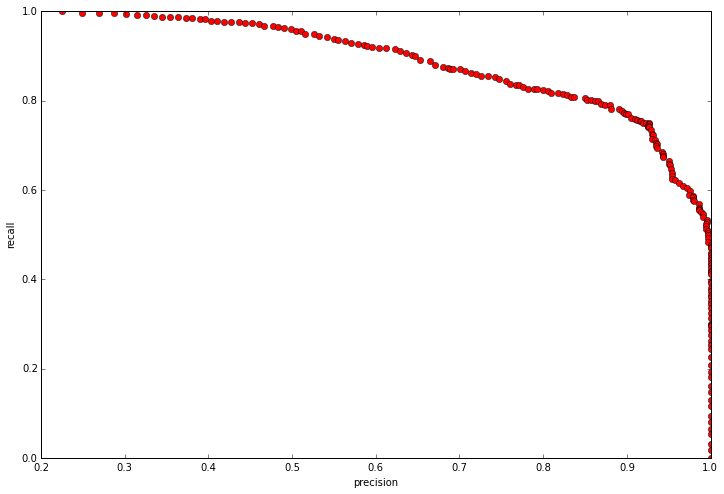

In [112]:
fig = plt.figure(figsize=(12,8))

plt.plot(precision, recall, 'ro')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

In [91]:
rf04_predictions

array([0, 1, 0, ..., 1, 0, 0])

In [94]:
rf04_probas[:,1]

array([ 0.075,  0.97 ,  0.05 , ...,  0.89 ,  0.08 ,  0.445])

In [106]:
precision.shape

(201,)

In [110]:
recall.shape

(201,)

In [107]:
thresholds.shape

(200,)

In [108]:
thresholds

array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
        0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,
        0.08 ,  0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,
        0.12 ,  0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,
        0.16 ,  0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,
        0.2  ,  0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,
        0.24 ,  0.245,  0.25 ,  0.255,  0.26 ,  0.265,  0.27 ,  0.275,
        0.28 ,  0.285,  0.29 ,  0.295,  0.3  ,  0.305,  0.31 ,  0.315,
        0.32 ,  0.325,  0.33 ,  0.335,  0.34 ,  0.345,  0.35 ,  0.355,
        0.36 ,  0.365,  0.37 ,  0.375,  0.38 ,  0.385,  0.39 ,  0.395,
        0.4  ,  0.405,  0.41 ,  0.415,  0.42 ,  0.425,  0.43 ,  0.435,
        0.44 ,  0.445,  0.45 ,  0.455,  0.46 ,  0.465,  0.47 ,  0.475,
        0.48 ,  0.485,  0.49 ,  0.495,  0.5  ,  0.505,  0.51 ,  0.515,
        0.52 ,  0.525,  0.53 ,  0.535,  0.54 ,  0.545,  0.55 ,  0.555,
      

In [109]:
precision

array([ 0.22518646,  0.24928367,  0.26879506,  0.28733945,  0.30201083,
        0.31447049,  0.32525084,  0.33462532,  0.34427684,  0.35436671,
        0.36402067,  0.37301205,  0.38041339,  0.38989899,  0.3963039 ,
        0.40293809,  0.41047568,  0.41821156,  0.42682248,  0.43604321,
        0.44425087,  0.45207101,  0.46098004,  0.46678967,  0.47675879,
        0.48311026,  0.4899416 ,  0.49867725,  0.50504371,  0.5105514 ,
        0.51592798,  0.52575865,  0.53228121,  0.54172767,  0.54966393,
        0.55471698,  0.56341276,  0.56997654,  0.5782367 ,  0.58548387,
        0.58957655,  0.59604287,  0.6038526 ,  0.61276596,  0.62305026,
        0.62917399,  0.63652641,  0.64363636,  0.64711274,  0.65237651,
        0.6647619 ,  0.67055394,  0.6798419 ,  0.686     ,  0.68850806,
        0.69269777,  0.70051282,  0.70686071,  0.71383316,  0.7196162 ,
        0.72570194,  0.73362445,  0.74197121,  0.74747475,  0.75570776,
        0.76069364,  0.76725146,  0.77058824,  0.77619048,  0.78

In [141]:
y4_test.value_counts()

0    2701
1     785
Name: inducted, dtype: int64

In [142]:
2701./785

3.440764331210191

### From http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

>>> from sklearn.datasets import load_iris
>>> from sklearn.cross_validation import cross_val_score
>>> from sklearn.tree import DecisionTreeClassifier
>>> clf = DecisionTreeClassifier(random_state=0)
>>> iris = load_iris()
>>> cross_val_score(clf, iris.data, iris.target, cv=10)

In [88]:
dt01 = DecisionTreeClassifier(class_weight='balanced')

In [89]:
temp = RandomForestClassifier(class_weight='balanced')

In [91]:
temp = SVC(class_weight='balanced')